In [1]:
%load_ext autoreload
%autoreload 2

# Лабораторная работа №1

In [2]:
import math
from functools import partial
from operator import itemgetter

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from bsuir_ml_2.datasets.not_mnist import (
    Dataset,
    fetch_small,
    fetch_large,
    read_large,
    read_small,
)
from bsuir_ml_2.datasets.not_mnist.util import get_class_examples, row_as_img
from bsuir_ml_2.util import invert_mapping, load_or_call


fetch_small()
fetch_large()

TEST_DATASET = read_small()
TRAIN_DATASET = read_large()

8462336it [00:02, 2928406.93it/s]                             
247341056it [01:10, 3498007.55it/s]                               


### Примеры изображений

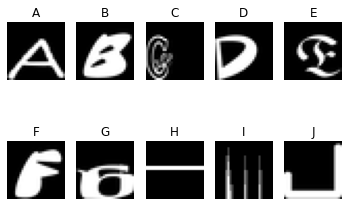

In [3]:
class_examples = sorted(get_class_examples(TRAIN_DATASET).items(), key=itemgetter(0))

img_col_count = 5
img_row_count = math.ceil(len(class_examples) / img_col_count)

img_fig, img_axes = plt.subplots(nrows=img_row_count, ncols=img_col_count)
img_axes_flat = np.ravel(img_axes)

for ax in img_axes_flat:
    ax.axis("off")

for (class_name, row), ax in zip(class_examples, img_axes_flat):
    ax.set_title(class_name)
    ax.imshow(row_as_img(row), cmap="gray")

### Проверка сбалансированности классов

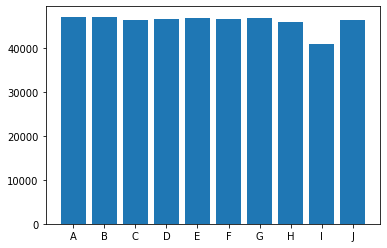

In [4]:
class_example_counts = sorted(
    (
        (name, len(examples)) 
        for name, examples in TRAIN_DATASET.examples_by_class.items()
    ),
    key=itemgetter(0)
)
class_names = tuple(map(itemgetter(0), class_example_counts))
example_counts = tuple(map(itemgetter(1), class_example_counts))

plt.bar(class_names, example_counts)
plt.show()

### Построение классификатора

In [5]:
train_test_splitter = partial(
    train_test_split,
    TRAIN_DATASET.x,
    TRAIN_DATASET.y,
    stratify=TRAIN_DATASET.y
)
x_train, x_test, y_train, y_test = train_test_splitter(train_size=200000, test_size=10000)

def model_factory():
    clf = LogisticRegression()
    return clf.fit(x_train, y_train)


clf = load_or_call("not_mnist_log_reg", model_factory)

### Оценка модели на тестовых данных

In [6]:
score = clf.score(TEST_DATASET.x, TEST_DATASET.y)
print(f"{score=:.2%}")

score=89.75%


### Зависимость точности классификатора от размера обучающей выборки

/home/dmitry/.local/share/virtualenvs/machine-learning-2-fXTKaPTI/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dmitry/.local/share/virtualenvs/machine-learning-2-fXTKaPTI/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solve

size=50	score=72.18%
size=100	score=79.40%
size=1000	score=83.27%
size=10000	score=85.90%
size=50000	score=89.09%


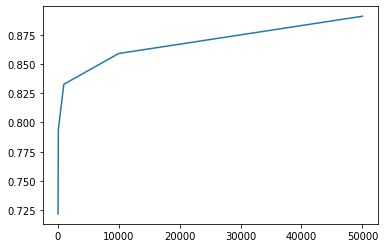

In [7]:
sizes = (50, 100, 1000, 10000, 50000)
scores = []
for s in sizes:
    x_train_cut, _, y_train_cut, _ = train_test_splitter(train_size=s)
    scores.append(
        LogisticRegression()
        .fit(x_train_cut, y_train_cut)
        .score(TEST_DATASET.x, TEST_DATASET.y)
    )

for size, score in zip(sizes, scores):
    print(f"{size=}\t{score=:.2%}")

plt.plot(sizes, scores)
plt.show()